**Import the datasets and libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv('/content/csv_result-JDT.csv')
df.head()


,id,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,1,0,0.000934,0.000000,4,0.00,0.00,0.004517,0.00000,0.00,...,0.000993,0.025009,0.000969,127,4,0.001007,1.03,0.198199,0.001036,clean
1,2,0,0.000741,0.000000,3,0.00,0.00,0.014817,0.00091,0.00,...,0.000889,0.001487,0.002523,8,9,0.000967,2.06,0.239334,0.000923,clean
2,3,0,0.000000,0.000000,4,0.00,1.01,0.024575,0.00000,0.00,...,0.002827,0.021650,0.003656,45,1,0.002917,1.20,0.187460,0.000000,clean
3,4,0,0.001529,0.015913,35,0.00,0.00,0.347495,0.00165,2.03,...,0.010602,0.012864,0.060975,94,21,0.027947,24.14,0.392389,0.001669,buggy
4,5,0,0.000000,0.000000,2,1.01,1.01,0.012120,0.00000,0.00,...,0.005223,0.023725,0.006207,73,0,0.007285,2.15,0.047726,0.000000,clean


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from tqdm import tqdm

## EDA

* import some dependencies to plot
* use plotly to visualization
    * label classification
        * count and plot(visualization)
    * value visualization
        * use historgram to visualization attribution
        * relationship
            * covariance
            * heatmap
    * scatter

In [4]:
# import some dependencies for plotting

from plotly.offline import iplot
import plotly.graph_objs as go

In [5]:
# check data
def show_info(data, is_matrix_transpose=False):
    # basic shape
    print('data shape is: {}   sample number {}   attribute number {}\n'.format(df.shape, df.shape[0], df.shape[1]))
    # attribute(key)
    print('data columns number {}  \nall columns: {}\n'.format(len(df.columns) ,df.columns))
    # value's null
    print('data all attribute count null:\n', df.isna().sum())
    # data value analysis and data demo
    if is_matrix_transpose:
        print('data value analysis: ', df.describe().T)
        print('data demo without matrix transpose: ', df.head().T)
    else:
        print('data value analysis: ', df.describe())
        print('data demo without matrix transpose: ', df.head())

show_info(df)

data shape is: (997, 63)   sample number 997   attribute number 63

data columns number 63  
all columns: Index(['id', 'ck_oo_numberOfPrivateMethods', 'LDHH_lcom', 'LDHH_fanIn',
       'numberOfNonTrivialBugsFoundUntil:', 'WCHU_numberOfPublicAttributes',
       'WCHU_numberOfAttributes', 'CvsWEntropy', 'LDHH_numberOfPublicMethods',
       'WCHU_fanIn', 'LDHH_numberOfPrivateAttributes', 'CvsEntropy',
       'LDHH_numberOfPublicAttributes', 'WCHU_numberOfPrivateMethods',
       'WCHU_numberOfMethods', 'ck_oo_numberOfPublicAttributes', 'ck_oo_noc',
       'numberOfCriticalBugsFoundUntil:', 'ck_oo_wmc',
       'LDHH_numberOfPrivateMethods', 'WCHU_numberOfPrivateAttributes',
       'CvsLogEntropy', 'WCHU_noc', 'LDHH_numberOfAttributesInherited',
       'WCHU_wmc', 'ck_oo_fanOut', 'ck_oo_numberOfLinesOfCode',
       'ck_oo_numberOfAttributesInherited', 'ck_oo_numberOfMethods',
       'ck_oo_dit', 'ck_oo_fanIn', 'LDHH_noc', 'WCHU_dit', 'ck_oo_lcom',
       'WCHU_numberOfAttributesInherited', 

Class label

In [6]:
from sklearn.preprocessing import LabelEncoder
# finding the count of different labels
df['class'].value_counts()

clean    791
buggy    206
Name: class, dtype: int64

In [7]:
# load the Label Encoder function
label_encode = LabelEncoder()

In [8]:
labels = label_encode.fit_transform(df["class"])

In [9]:
# appending the labels to the DataFrame
df["class"] = labels

<Axes: >

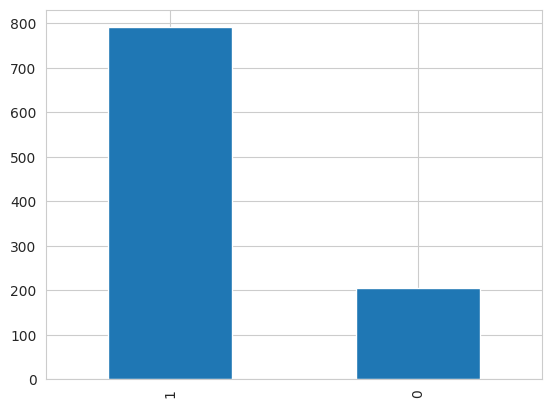

In [10]:
# label classification
df['class'].value_counts().plot.bar()

In [11]:
df.corr()

,id,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
id,1.000000,-0.004050,0.020531,0.051403,0.029961,0.020080,-0.010939,0.026567,0.011210,0.066546,...,0.050332,-0.025839,0.032936,-0.006252,-0.000740,0.055331,0.036330,0.038985,0.022722,0.020520
ck_oo_numberOfPrivateMethods,-0.004050,1.000000,0.546243,0.102584,0.500429,0.419688,0.457311,0.543271,0.252862,0.128856,...,0.394863,-0.046562,0.489318,-0.110266,0.170970,0.281304,0.564771,0.304112,0.552963,-0.238242
LDHH_lcom,0.020531,0.546243,1.000000,0.409128,0.610908,0.408861,0.485695,0.558189,0.780447,0.423781,...,0.604405,0.155119,0.748919,0.007894,0.395482,0.601213,0.725557,0.500495,0.996665,-0.371588
LDHH_fanIn,0.051403,0.102584,0.409128,1.000000,0.389176,0.194380,0.256511,0.299094,0.513558,0.900964,...,0.313543,0.090740,0.402334,0.026521,0.339925,0.841620,0.401675,0.350257,0.416615,-0.202935
numberOfNonTrivialBugsFoundUntil:,0.029961,0.500429,0.610908,0.389176,1.000000,0.426345,0.548055,0.749817,0.465924,0.423023,...,0.574697,0.101740,0.781371,-0.003842,0.420114,0.537211,0.830664,0.595370,0.619973,-0.474638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LDHH_cbo,0.055331,0.281304,0.601213,0.841620,0.537211,0.311942,0.409692,0.491990,0.606024,0.766832,...,0.736622,0.136252,0.664902,0.041957,0.349842,1.000000,0.615992,0.555033,0.605935,-0.340652
WCHU_numberOfLinesOfCode,0.036330,0.564771,0.725557,0.401675,0.830664,0.557660,0.603235,0.819918,0.566053,0.457840,...,0.675468,0.143535,0.874478,0.014441,0.446061,0.615992,1.000000,0.580002,0.738327,-0.496221
CvsExpEntropy,0.038985,0.304112,0.500495,0.350257,0.595370,0.279270,0.355722,0.466439,0.418782,0.355764,...,0.580033,0.175716,0.655263,0.105444,0.242444,0.555033,0.580002,1.000000,0.499921,-0.409857
LDHH_numberOfMethods,0.022722,0.552963,0.996665,0.416615,0.619973,0.415155,0.488312,0.570264,0.791273,0.436386,...,0.603907,0.155409,0.752295,0.001892,0.416908,0.605935,0.738327,0.499921,1.000000,-0.370877


<ipython-input-12-4abd0cdf933f>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



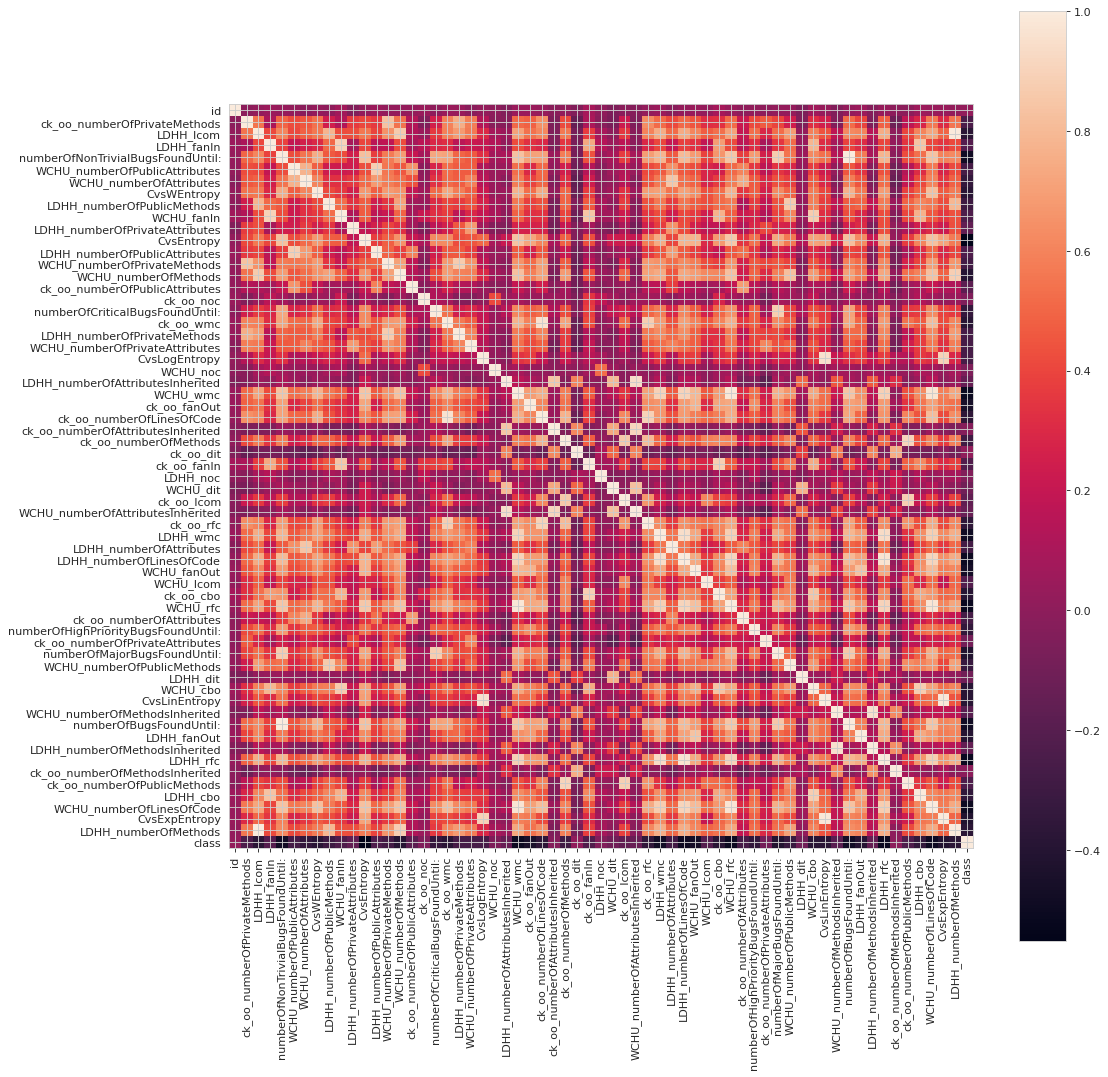

In [12]:
# plot corr
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

plotCorrelationMatrix(df, 15)

<ipython-input-13-6ec3fc198971>:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



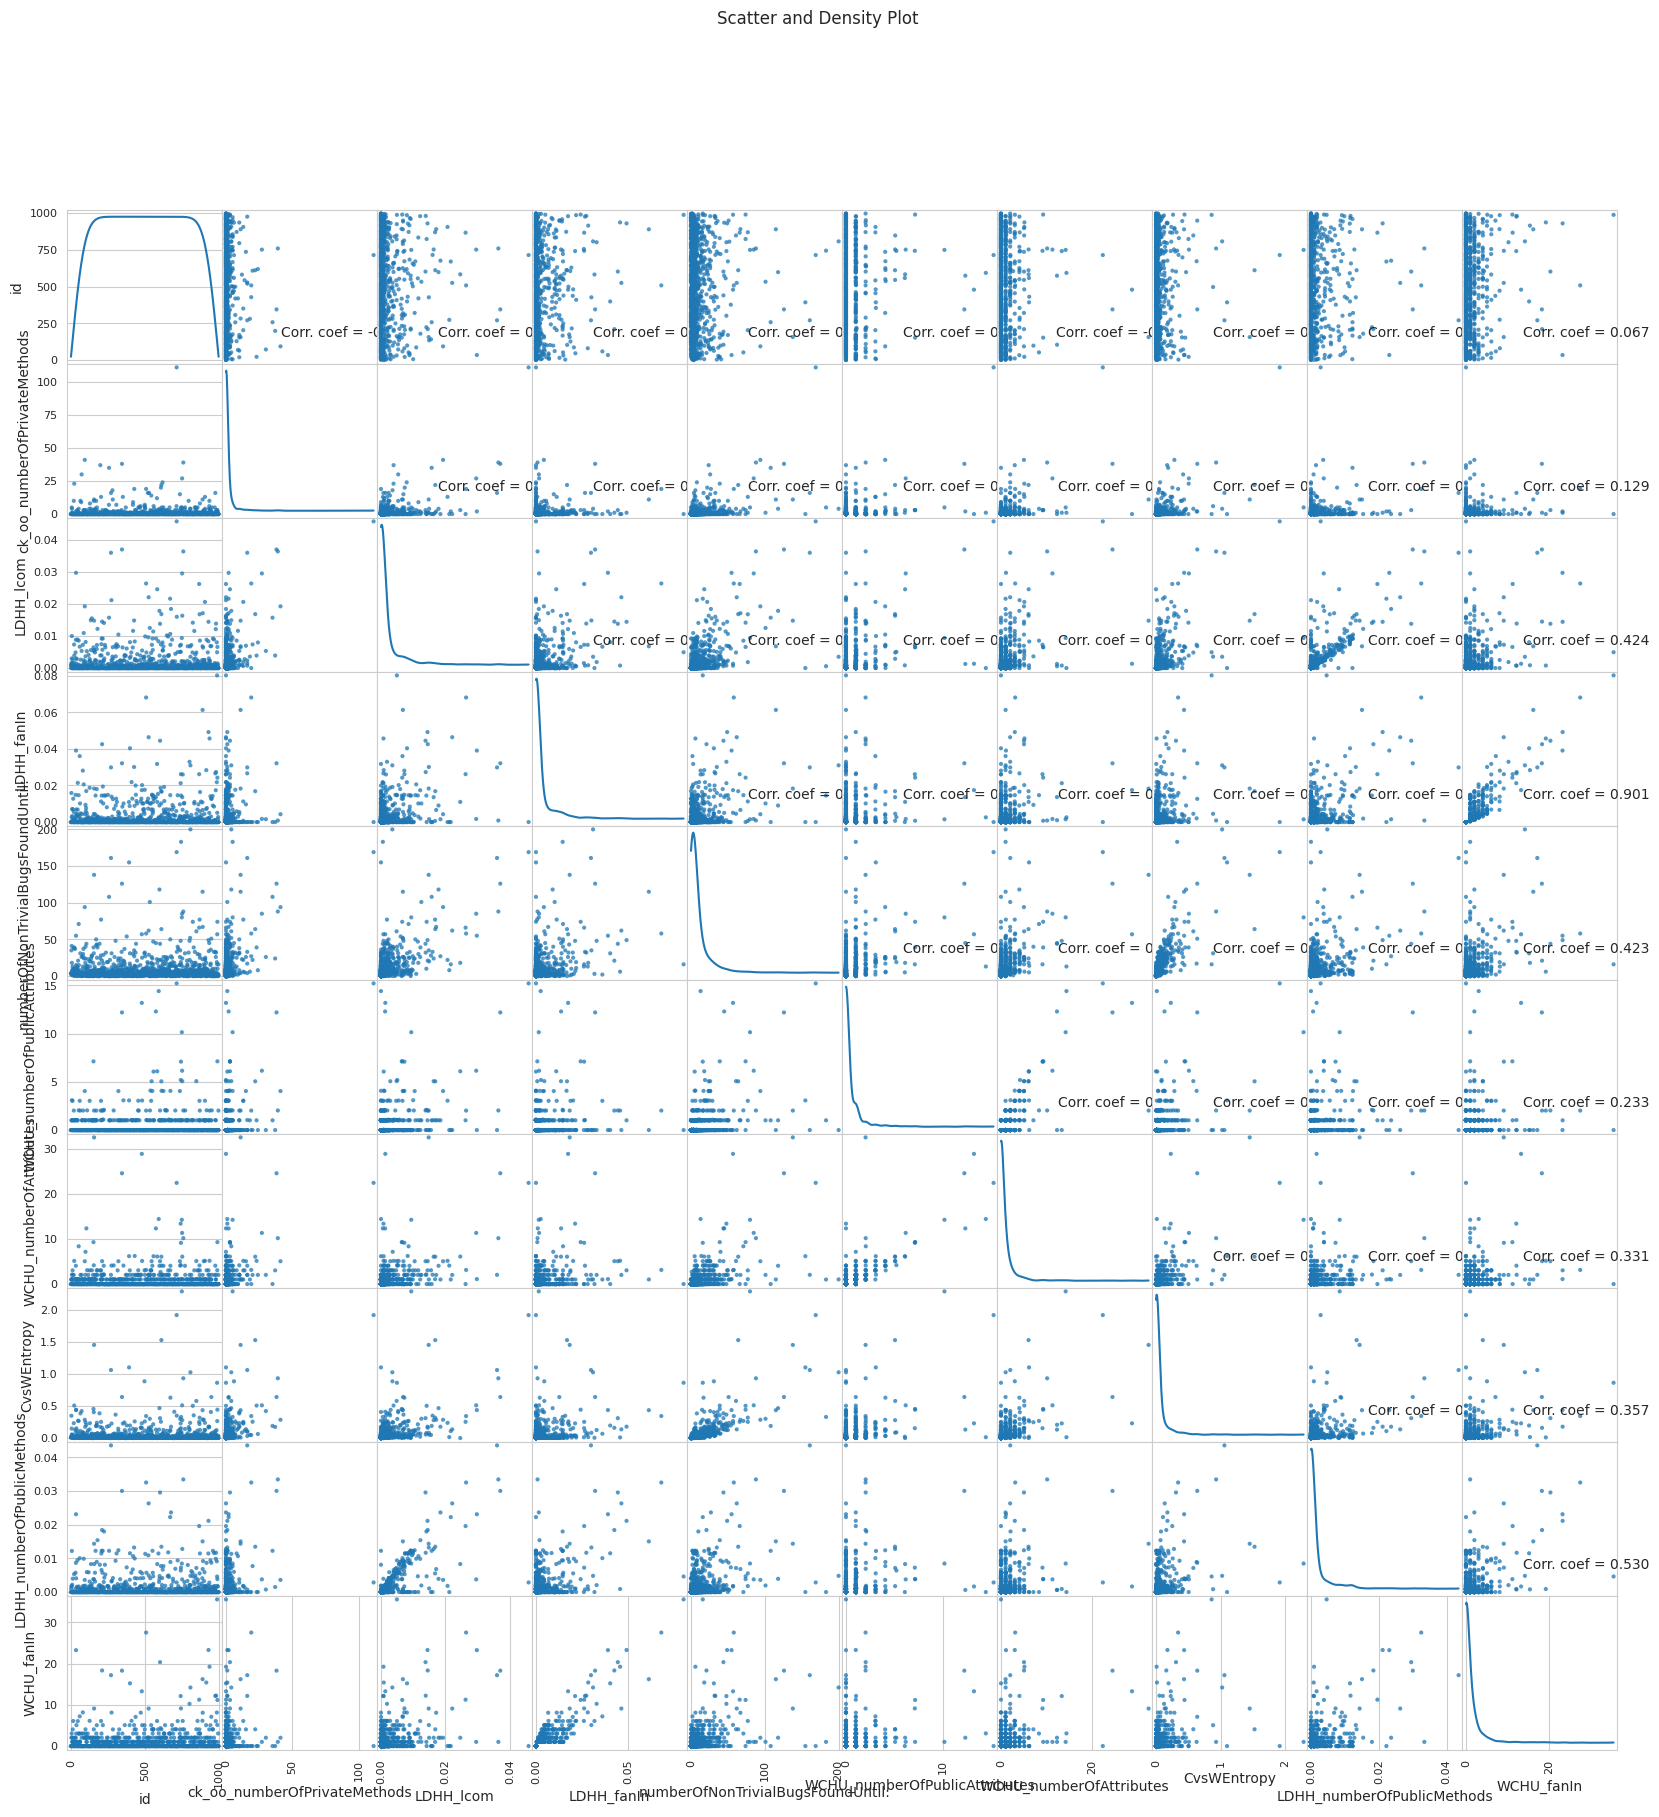

In [13]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df, 20, 10)

**NORMALIZATION**

In [14]:
from sklearn import preprocessing
def change(X):
    length = X.shape[0]
    d=pd.Series(np.ones((length)))
    for i in range(0, length, 73):
        d[i]=0
    return d
def a(X):
    length = X.shape[0]
    d=pd.Series(np.zeros((length)))
    for i in range(0, length, 20):
        d[i]=1
    return d


In [15]:
def change(X):
    length = X.shape[0]
    d=pd.Series(np.ones((length)))
    for i in range(0, length, 73):
        d[i]=0
    return d
def a(X):
    length = X.shape[0]
    d=pd.Series(np.zeros((length)))
    for i in range(0, length, 20):
        d[i]=1
    return d

**SMOTE-TOMEK**

In [16]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [17]:
pip install imblearn

In [18]:
pip install seaborn

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from collections import Counter


# Assuming the last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE-Tomek only on the training data
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)




<ipython-input-20-996aeb56b06b>:5: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



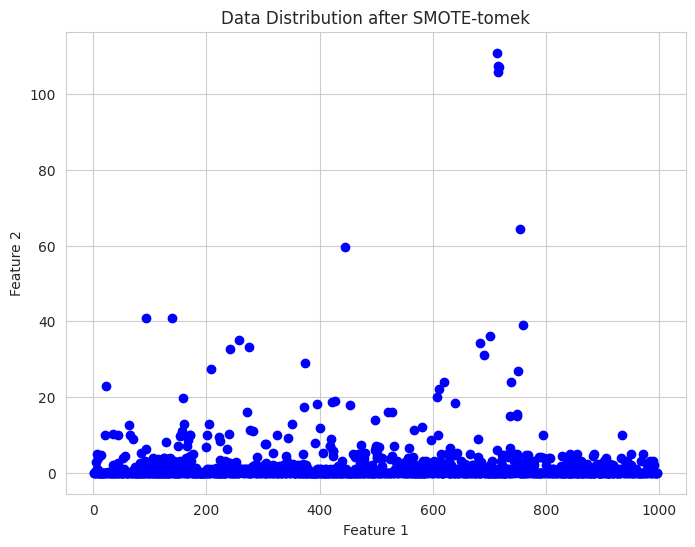

In [20]:
from imblearn.combine import SMOTETomek

# Visualize the data distribution after applying SMOTE
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c='blue', cmap=plt.cm.Paired, marker='o')
plt.title("Data Distribution after SMOTE-tomek")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**KNN**

In [21]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



In [23]:
import math
math.sqrt(len(y_test))

14.142135623730951

In [24]:
#Define the model
knn_model = KNeighborsClassifier (n_neighbors=13, p=2, metric='euclidean')

#fit model
knn_model.fit(X_resampled, y_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [25]:
X_test.shape

(200, 62)

In [26]:
# Predict the test set results
knn_pred = knn_model.predict(X_test)
y_pred = knn_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1])

In [27]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)


[[ 29  16]
 [ 37 118]]


In [28]:
print(accuracy_score(y_test, y_pred))

0.735


**DECISION TREE**

In [29]:
#import the necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [30]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
feature_names = X_train
dt_model = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [32]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

Accuracy: 1.00


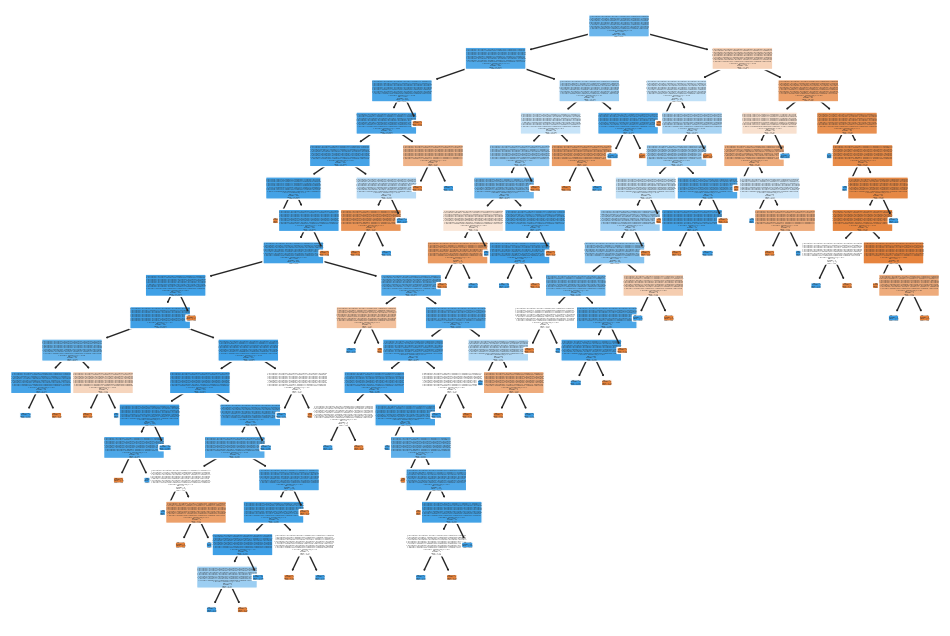

In [33]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate and print the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, feature_names=feature_names, class_names=['True','False'], filled=True, rounded=True)
plt.show()

In [34]:
#function to perform training with entropy
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model= dt_model.fit(X_resampled, y_resampled)

In [35]:
y_pred_en = dt_model.predict(X_test)
y_pred_en

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1])

In [36]:
print ("Accuracy is "),metrics.accuracy_score(y_test,y_pred_en)*100


Accuracy is 


(None, 80.5)

[Text(0.5084206586826348, 0.9642857142857143, 'x[24] <= 2.194\nentropy = 1.0\nsamples = 1246\nvalue = [623, 623]'),
 Text(0.26721556886227543, 0.8928571428571429, 'x[54] <= 0.005\nentropy = 0.78\nsamples = 666\nvalue = [154, 512]'),
 Text(0.1601796407185629, 0.8214285714285714, 'x[17] <= 0.002\nentropy = 0.474\nsamples = 433\nvalue = [44, 389]'),
 Text(0.09281437125748503, 0.75, 'x[57] <= 0.903\nentropy = 0.333\nsamples = 391\nvalue = [24, 367]'),
 Text(0.059880239520958084, 0.6785714285714286, 'x[53] <= 0.0\nentropy = 1.0\nsamples = 20\nvalue = [10, 10]'),
 Text(0.04790419161676647, 0.6071428571428571, 'x[35] <= 1.5\nentropy = 0.65\nsamples = 12\nvalue = [2, 10]'),
 Text(0.03592814371257485, 0.5357142857142857, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.059880239520958084, 0.5357142857142857, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.0718562874251497, 0.6071428571428571, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.12574850299401197, 0.678571428571

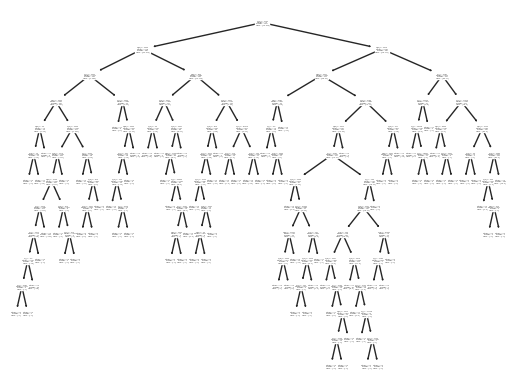

In [37]:
from sklearn import tree
tree.plot_tree(dt_model)

**SVM**

In [38]:
from sklearn.svm import SVC
svm_model = SVC()

In [39]:
svm_model.fit(X_resampled, y_resampled)

SVC()

In [40]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [41]:
svm_model.score(X_test, y_test)

0.795

In [42]:
svm_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [43]:
#Tune parameters
#1. Regularization (C)
svm_model_C = SVC(C=1)
svm_model_C.fit(X_resampled, y_resampled)
svm_model_C.score(X_test, y_test)

0.81

In [44]:
svm_model_C = SVC(C=10)
svm_model_C.fit(X_resampled, y_resampled)
svm_model_C.score(X_test, y_test)

0.805

**NAIVE**


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [46]:
from sklearn.naive_bayes import GaussianNB

# Assuming X contains numerical features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the classifier
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.47      0.55        45
           1       0.86      0.93      0.89       155

    accuracy                           0.82       200
   macro avg       0.76      0.70      0.72       200
weighted avg       0.81      0.82      0.81       200

Accuracy: 0.825


In [47]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

**GENETIC ALGORITHM BASED ON ARTIFICAL NEURAL NETWORK (GA-ANN)**

In [48]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.8 MB/s eta 0:00:00


In [49]:
pip install deap keras


In [50]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define genetic algorithm parameters
population_size = 10
num_generations = 5
mutation_rate = 0.1

# Function to create a simple feedforward neural network
def create_neural_network():
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to initialize a random population of neural networks
def initialize_population(population_size):
    return [create_neural_network() for _ in range(population_size)]

# Function to evaluate the fitness of each neural network in the population
def evaluate_population(population, X_train, y_train, X_test, y_test):
    fitness_scores = []
    for model in population:
        model.fit(X_train, y_train, epochs=5, verbose=0)
        predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
        accuracy = accuracy_score(y_test, predictions)
        fitness_scores.append(accuracy)
    return fitness_scores

# Function for tournament selection
def tournament_selection(fitness_scores, tournament_size):
    selected_indices = []
    for _ in range(len(fitness_scores)):
        tournament_indices = np.random.choice(len(fitness_scores), tournament_size, replace=False)
        winner_index = max(tournament_indices, key=lambda i: fitness_scores[i])
        selected_indices.append(winner_index)
    return selected_indices

# Function for one-point crossover
def crossover(parent1, parent2):
    child1 = create_neural_network()
    child2 = create_neural_network()

    for layer in range(len(child1.layers)):
        crossover_point = np.random.randint(0, 2)
        if crossover_point == 0:
            child1.layers[layer].set_weights(parent1.layers[layer].get_weights())
            child2.layers[layer].set_weights(parent2.layers[layer].get_weights())
        else:
            child1.layers[layer].set_weights(parent2.layers[layer].get_weights())
            child2.layers[layer].set_weights(parent1.layers[layer].get_weights())

    return child1, child2

# Function for mutation
def mutate(model, mutation_rate):
    for layer in range(len(model.layers)):
        if np.random.rand() < mutation_rate:
            new_weights = [w + np.random.normal(0, 0.1, w.shape) for w in model.layers[layer].get_weights()]
            model.layers[layer].set_weights(new_weights)
    return model

# Main genetic algorithm loop
population = initialize_population(population_size)

# Lists to store evolution data
gen_numbers = []
max_accuracies = []

for generation in range(num_generations):
    fitness_scores = evaluate_population(population, X_train, y_train, X_test, y_test)

    # Select parents using tournament selection
    selected_indices = tournament_selection(fitness_scores, tournament_size=2)

    # Create new generation using crossover and mutation
    new_population = []
    for i in range(0, len(selected_indices), 2):
        parent1 = population[selected_indices[i]]
        parent2 = population[selected_indices[i + 1]]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        new_population.extend([child1, child2])

    population = new_population

    # Collect evolution data
    best_model = max(population, key=lambda model: accuracy_score(y_test, (model.predict(X_test) > 0.5).astype(int).flatten()))
    max_accuracy = accuracy_score(y_test, (best_model.predict(X_test) > 0.5).astype(int).flatten())

    gen_numbers.append(generation)
    max_accuracies.append(max_accuracy)



7/7 [==============================] - 0s 2ms/step


In [51]:
# Select the best neural network from the final population
best_model = max(population, key=lambda model: accuracy_score(y_test, (model.predict(X_test) > 0.5).astype(int).flatten()))
print("Best Neural Network Accuracy:", accuracy_score(y_test, (best_model.predict(X_test) > 0.5).astype(int).flatten()))

7/7 [==============================] - 0s 7ms/step
Best Neural Network Accuracy: 0.875


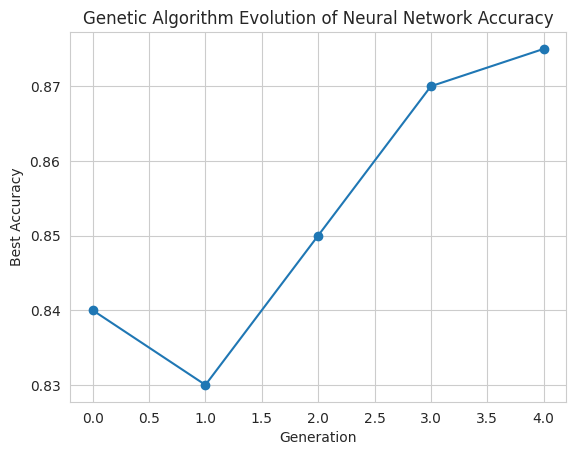

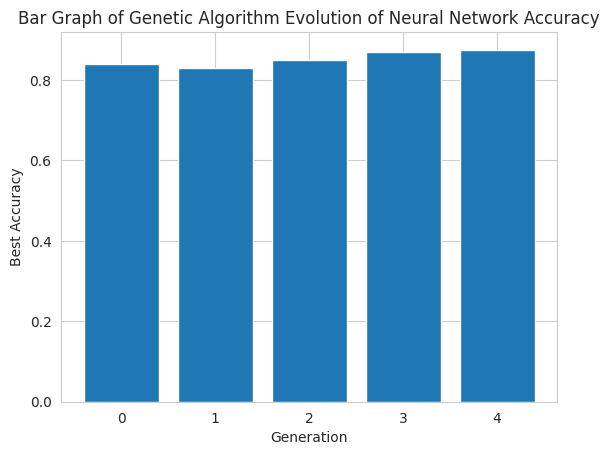

In [52]:
# Plot the evolution of accuracy
plt.plot(gen_numbers, max_accuracies, marker='o')
plt.xlabel('Generation')
plt.ylabel('Best Accuracy')
plt.title('Genetic Algorithm Evolution of Neural Network Accuracy')
plt.show()

# Plot bar graph for accuracy
plt.bar(range(len(max_accuracies)), max_accuracies)
plt.xlabel('Generation')
plt.ylabel('Best Accuracy')
plt.title('Bar Graph of Genetic Algorithm Evolution of Neural Network Accuracy')
plt.show()

**EVALUATING OTHER ALGORITHMS**

Model: Decision Tree
Accuracy: 0.8250
Confusion Matrix:
[[ 28  17]
 [ 18 137]]

Model: KNN
Accuracy: 0.7350
Confusion Matrix:
[[ 29  16]
 [ 37 118]]

Model: SVM
Accuracy: 0.7950
Confusion Matrix:
[[  8  37]
 [  4 151]]

Model: Naive Bayes
Accuracy: 0.8250
Confusion Matrix:
[[ 21  24]
 [ 11 144]]



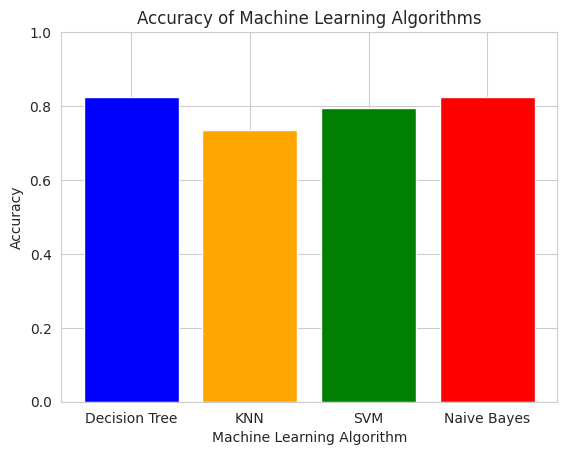

In [53]:
# Evaluate models and store results

models = {'Decision Tree': dt_pred,
          'KNN': knn_pred,
          'SVM': svm_pred,
          'Naive Bayes': nb_pred}

model_results = {}
for name, pred in models.items():
    acc = accuracy_score(y_test, pred)
    model_results[name] = acc
    cm = confusion_matrix(y_test, pred)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Plot bar graph
plt.bar(model_results.keys(), model_results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Algorithms')
plt.ylim([0, 1])  # Set the y-axis limit to better visualize differences
plt.show()